### Bhavya Sri
### BL.EN.I4AIE21025

### A1. Use librosa.effects.trim() to remove the silence parts of speech from beginning and end of your recorded signal. Listen to the new signal and perceptually compare the audio with original.

Original Signal:


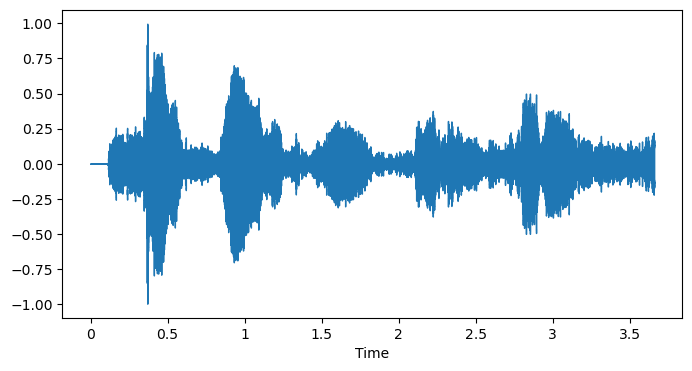

Trimmed Signal:


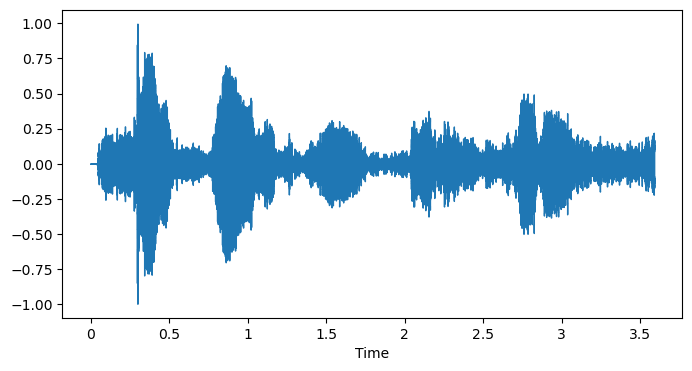

In [22]:
from IPython.display import Audio
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file
y, sr = librosa.load('5words(a).wav')

# Trim the silence from the beginning and end
y_trimmed, index = librosa.effects.trim(y)

# Display and play the original signal
print("Original Signal:")
plt.figure(figsize=(8, 4))
librosa.display.waveshow(y, sr=sr)
plt.show()

# Display and play the trimmed signal
print("Trimmed Signal:")
plt.figure(figsize=(8, 4))
librosa.display.waveshow(y_trimmed, sr=sr)
plt.show()



In [23]:
print("Original Voice")
Audio(data=y, rate=sr)  

Original Voice


In [24]:

print("Trimmed Voice")
Audio(data=y_trimmed, rate=sr)

Trimmed Voice


### A2. Use librosa.effects.split() to split the recorded speech with detected silences. Play around with the top_db parameter and see the effects of split. Listen to the generated signals and observe the split quality.

Original Signal:


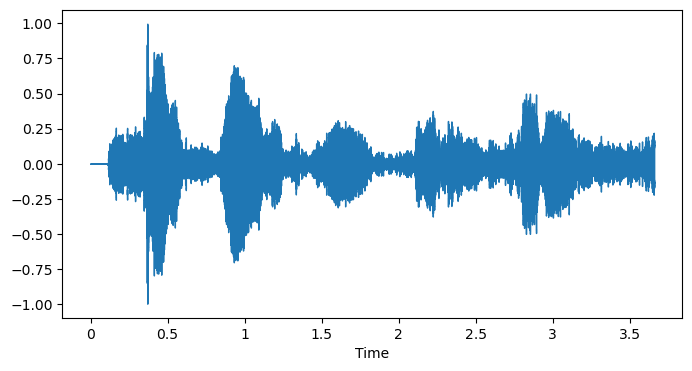

Split Signal (top_db=12):


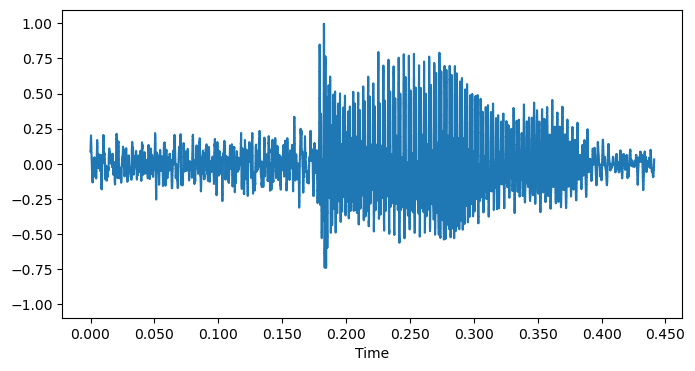

Split Signal (top_db=12):


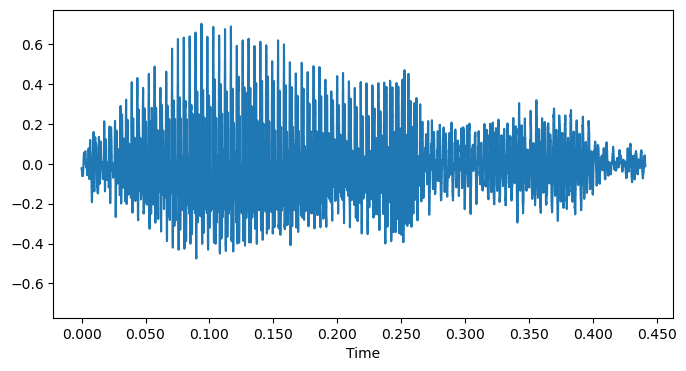

Split Signal (top_db=12):


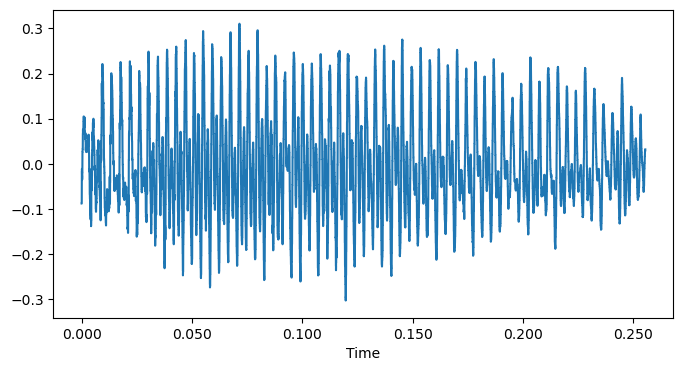

Split Signal (top_db=12):


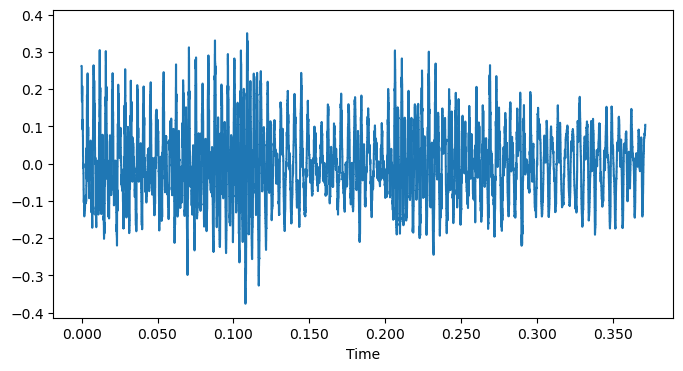

Split Signal (top_db=12):


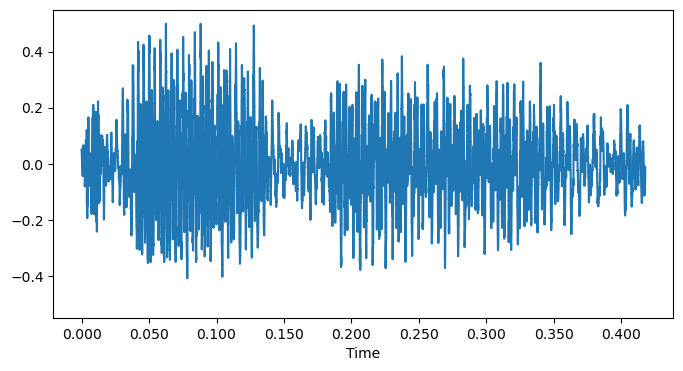

In [40]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd

# Load the audio file
y, sr = librosa.load('5words(a).wav')

# Set different top_db values for splitting
top_db_values = [12]

# Plot and play the original signal
print("Original Signal:")
plt.figure(figsize=(8, 4))
librosa.display.waveshow(y, sr=sr)
plt.show()

ipd.Audio(data=y, rate=sr)  # Play the original signal

# Apply librosa.effects.split() with different top_db values
for top_db in top_db_values:
    # Split the signal
    intervals = librosa.effects.split(y, top_db=top_db)

    # Plot and play each segment
    for interval in intervals:
        start, end = interval
        segment = y[start:end]

        print(f"Split Signal (top_db={top_db}):")
        plt.figure(figsize=(8, 4))
        librosa.display.waveshow(segment, sr=sr)
        plt.show()

        ipd.display(ipd.Audio(data=segment, rate=sr))

# Note: Replace 'path/to/your/audio/file.wav' with the actual path to your audio file.


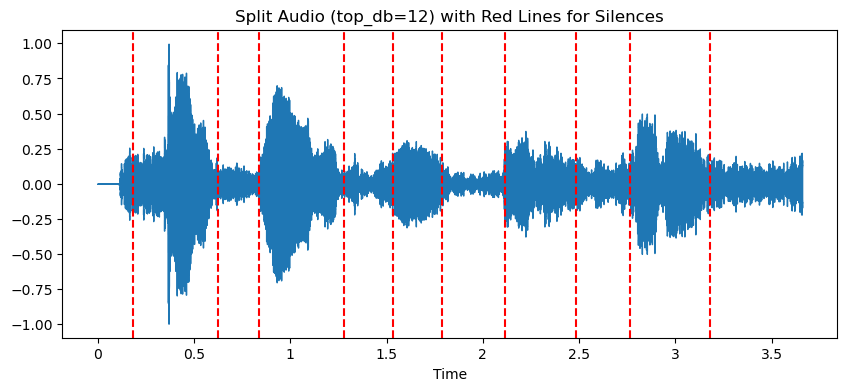

In [41]:
# Split the audio using librosa.effects.split() with different top_db values
top_db_values = [12]  # You can adjust these values

for top_db in top_db_values:
    splits = librosa.effects.split(y, top_db=top_db)

    # Plot and listen to each split with red lines indicating silences
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr)

    for split in splits:
        plt.axvline(x=split[0]/sr, color='red', linestyle='--')  # Start of silence
        plt.axvline(x=split[1]/sr, color='red', linestyle='--')  # End of silence

    plt.title(f'Split Audio (top_db={top_db}) with Red Lines for Silences')
    plt.show()

    # Listen to the split audio
    for i, split in enumerate(splits):
        split_audio = y[split[0]:split[1]]
        ipd.Audio(split_audio, rate=sr)  # Listen to the split audio

### A3. Use the IEEE paper reference available above for silence detection. Compare the results with the silence detection output from librosa package.

In [43]:
import numpy as np

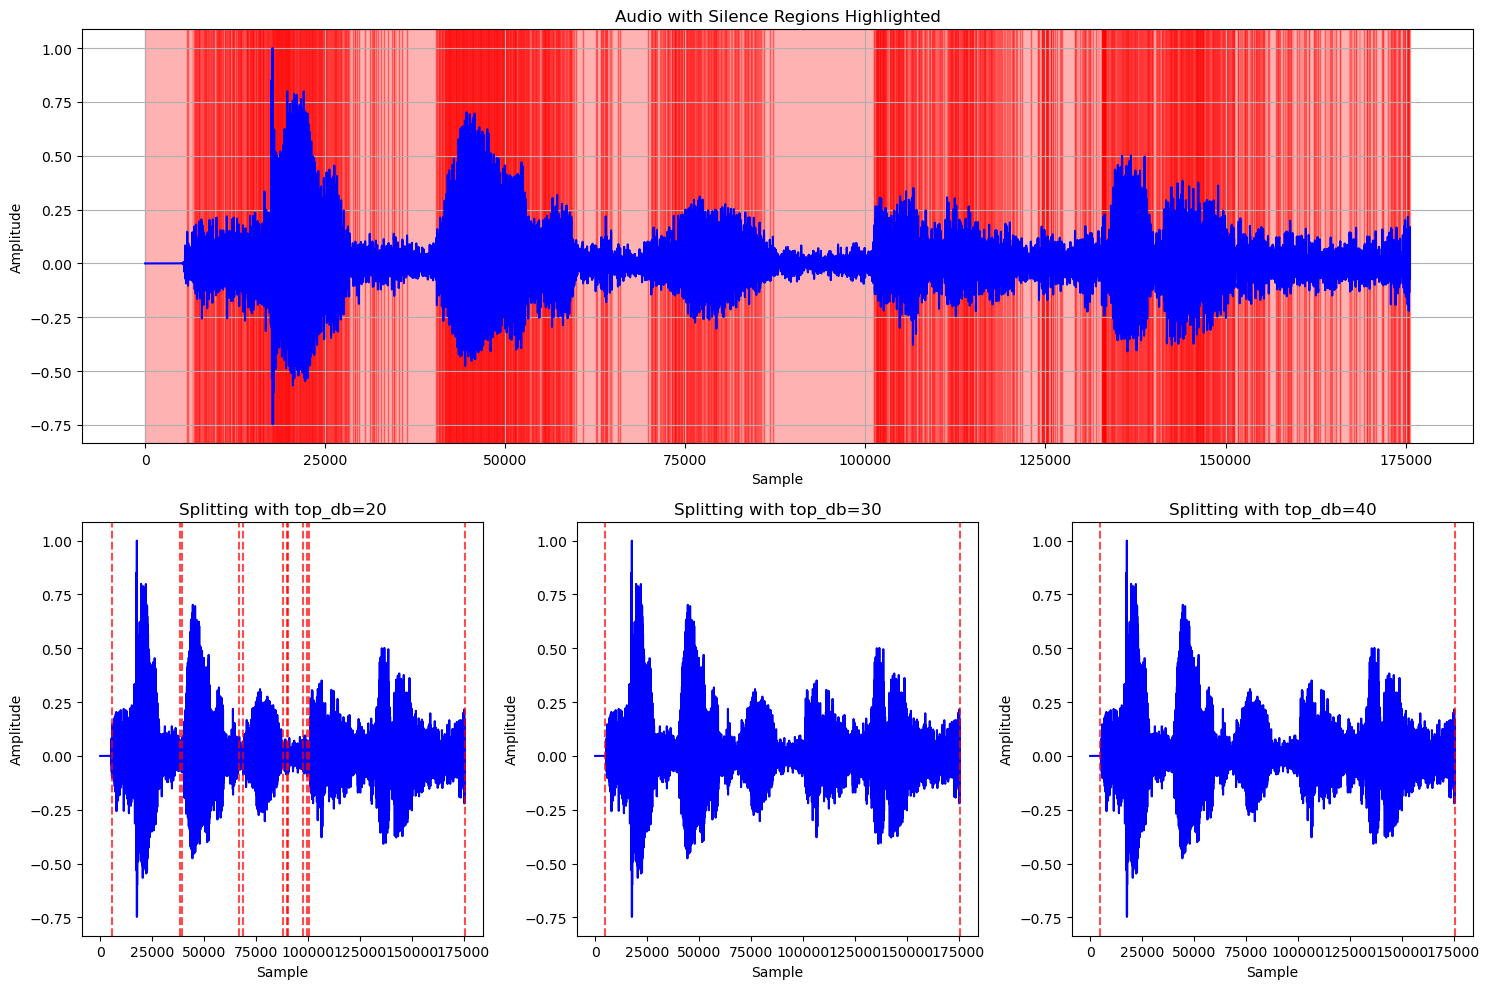

In [44]:
# Define a function to calculate the energy of a given signal
def calculate_energy(signal):
    squared_signal = np.square(signal)  # Calculate the squared signal
    energy = np.sum(squared_signal)  # Calculate the total energy by summing the squared samples
    return energy

# Function to detect silence based on energy threshold
def detect_silence(signal, threshold):
    energy = calculate_energy(signal)
    if energy < threshold:  # If the energy is below the threshold, consider it as silence
        return True
    else:
        return False

# Load the audio file
file_path = "5words(a).wav"
audio_signal, sample_rate = librosa.load(file_path, sr=None)

# Define an energy threshold for silence detection
energy_threshold = 0.01  # Adjust this threshold as needed

# Detect silence regions in the audio
silence_regions = []
current_region = []
for i, sample in enumerate(audio_signal):
    if detect_silence(sample, energy_threshold):
        current_region.append(i)
    elif current_region:
        silence_regions.append(current_region)
        current_region = []
if current_region:
    silence_regions.append(current_region)

# Perform splitting with different top_db values
top_db_values = [20, 30, 40]  # You can adjust these values as needed

# Plot the waveform with silence regions highlighted and split intervals overlaid
plt.figure(figsize=(15, 10))

# Plot the waveform with silence regions highlighted
plt.subplot(2, 1, 1)
plt.plot(audio_signal, color='b')
for region in silence_regions:
    plt.axvspan(region[0], region[-1], color='r', alpha=0.3)
plt.title("Audio with Silence Regions Highlighted")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)

# Plot the waveform with split intervals overlaid
for i, top_db in enumerate(top_db_values):
    plt.subplot(2, len(top_db_values), len(top_db_values) + i + 1)
    split_audio_intervals = librosa.effects.split(audio_signal, top_db=top_db)
    plt.plot(audio_signal, color='b')
    for interval in split_audio_intervals:
        plt.axvline(interval[0], color='r', linestyle='--', alpha=0.7)
        plt.axvline(interval[1], color='r', linestyle='--', alpha=0.7)
    plt.title(f"Splitting with top_db={top_db}")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.tight_layout()

plt.show()